# Monreal election analysis

## 1. Import packages

In [1]:
# packages
import plotly.graph_objects as go
import plotly.express as px

# data package from plotly
data = px.data.election()

## 2. Data

In [3]:
# data package from plotly
data = px.data.election()
data.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [4]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     58 non-null     object
 1   Coderre      58 non-null     int64 
 2   Bergeron     58 non-null     int64 
 3   Joly         58 non-null     int64 
 4   total        58 non-null     int64 
 5   winner       58 non-null     object
 6   result       58 non-null     object
 7   district_id  58 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ KB


## 3. Coderre vs Bergeon vs Joly analysis

### 3.1 Votes breakdown by district

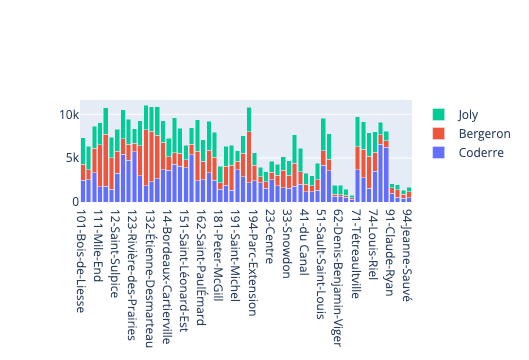

In [6]:
# create figure
fig1 = go.Figure(
    data=[
        # bars for each candidate
        go.Bar(x=data['district'], y=data['Coderre'], name="Coderre"),
        go.Bar(x=data['district'], y=data['Bergeron'], name="Bergeron"),
        go.Bar(x=data['district'], y=data['Joly'], name="Joly")
    ],
    layout={
        # stack
        'barmode': 'stack'
    }
)

fig1.show()

### 3.2 Improved votes breakdown by district (Coderre POV)

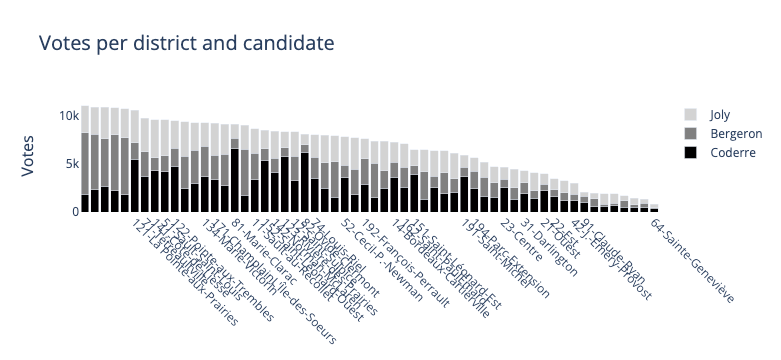

In [12]:
# sort data by asending value
data = data.sort_values('total', ascending=False)

# display only ticks where Coderre candidate won
x_ticks = data[data['winner']=='Coderre']['district'].values

# create figure
fig2 = go.Figure(data=[
    go.Bar(x=data['district'], y=data['Coderre'], name="Coderre", marker_color="black"),
    go.Bar(x=data['district'], y=data['Bergeron'], name="Bergeron", marker_color="gray"),
    go.Bar(x=data['district'], y=data['Joly'], name="Joly", marker_color="lightgray")
])

# layout update
fig2.update_layout(
    # stack
    barmode="stack",
    plot_bgcolor="white",
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45},
    yaxis={"title": {"text": "Votes", "font": {"size": 16}}},
    # regroup labels in same hover
    hovermode="x unified",
    title={'text': "Votes per district and candidate", "font": {"size": 20}}
)

fig2.show()

### 3.3 Total votes per candidate

In [13]:
# get votes sum per candidate
df_votes = data[['Coderre', 'Bergeron', 'Joly']].sum()
df_votes

Coderre     149467
Bergeron    118637
Joly        123062
dtype: int64

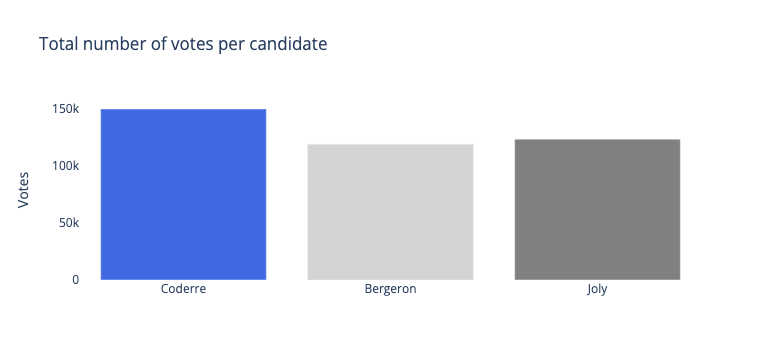

In [14]:
# create figure
fig3 = go.Figure(
    data=[
        go.Bar(
            x = df_votes.index,
            y = df_votes,
            marker_color = ["RoyalBlue", "LightGray", "Gray"]
        ),
    ],
    layout_plot_bgcolor = "white",
    layout_hovermode = "x unified",
    layout_title_text = "Total number of votes per candidate",
    layout_yaxis_title = "Votes"
)

fig3.show()

## 4. Map plot via GeoJSON

### 4.1 Import election and geojson election data

In [15]:
geojson = px.data.election_geojson()
ds = px.data.election()

In [19]:
# data election
ds.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [43]:
# geojson data election first feature check (polygons defining the shape of each district)
geojson.keys()

dict_keys(['type', 'features'])

In [61]:
# district info from election data
print(ds["district"][2])

# same district from geojson
print(geojson["features"][0]["properties"])

11-Sault-au-Récollet
{'district': '11-Sault-au-Récollet'}


In [42]:
# check json format
geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.6363215300962, 45.5759177646435],
     [-73.6362833815582, 45.5758266113331],
     [-73.6446417578686, 45.5658132919643],
     [-73.6453511352974, 45.5647725775888],
     [-73.648867564748, 45.5586898267402],
     [-73.6513170845065, 45.5545659435652],
     [-73.6515658357324, 45.5554439857955],
     [-73.6660837831645, 45.5596724837829],
     [-73.6706609041685, 45.5610978251999],
     [-73.6676019919116, 45.5632340862888],
     [-73.6645385824068, 45.5642716484367],
     [-73.663663123697, 45.5654269638586],
     [-73.663336397858, 45.5666288247853],
     [-73.6637764768649, 45.5678900619231],
     [-73.6625073244826, 45.5688479494114],
     [-73.6624620526633, 45.5708304456346],
     [-73.6620201425015, 45.5713925326191],
     [-73.6616100197742, 45.5737924780218],
     [-73.6612199500215, 45.5747171555678],
     [-73.6625087613399, 45.5748980132699],
     [-73.6639172423219, 45.5730041908097],
     [

### 4.2 Election winner per district on map visualization

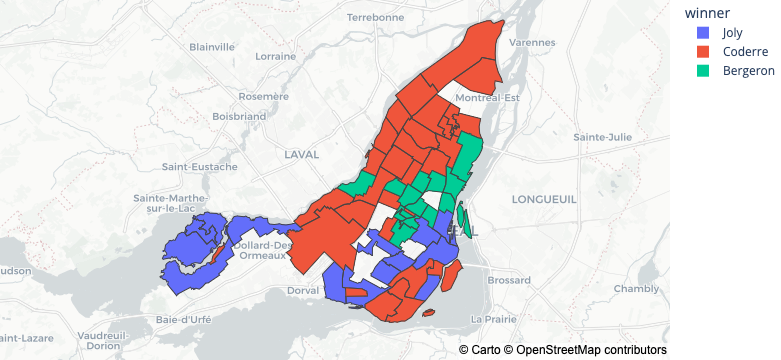

In [56]:
fig = px.choropleth_mapbox(
    ds, 
    geojson=geojson, 
    color="winner",
    locations="district", 
    featureidkey="properties.district",
    center={"lat": 45.5517, "lon": -73.7073},
    mapbox_style="carto-positron", 
    zoom=9
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### 4.3 N. votes per district for candidate Joly

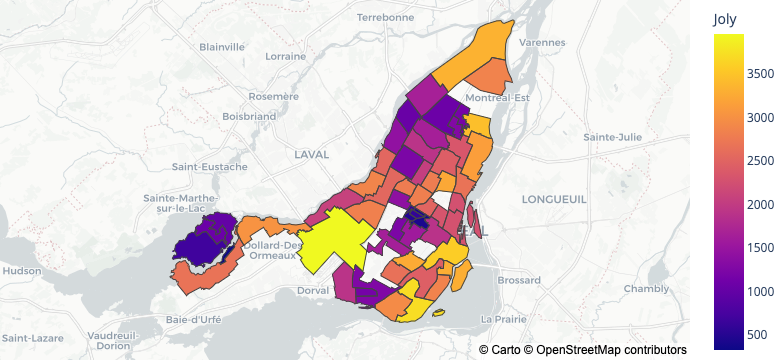

In [67]:
fig = px.choropleth_mapbox(
    ds, 
    geojson=geojson, 
    color="Joly",
    locations="district", 
    featureidkey="properties.district",
    center={"lat": 45.5517, "lon": -73.7073},
    mapbox_style="carto-positron", 
    zoom=9
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [66]:
import geopandas as gpd

df = px.data.election()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")

fig = px.choropleth_mapbox(geo_df,
                           geojson=geo_df.geometry,
                           locations=geo_df.index,
                           color="Joly",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="open-street-map", zoom=9)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'geopandas'